<a href="https://colab.research.google.com/github/Manuel-FA/Machine_Learning/blob/main/Customer%20churn%20-%20Dataset_1%20-%20Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ABSTRACT**

*   Assertions were made regarding an exploratory data analysis, customers that rotated were predicted with an accuracy of 97.186% and it was determined that varibels have a greater impact.
*   Model: XGBoost
*   Libraries used: Numpy, Pandas, MatPlotLib, Seaborn, Scikitplot, Scipy and Sklearn

# **1. Introduction**

---



## **1.1. Content**

    1. Introduction
      1.1. Content
      1.2. Problem statement
    2. Project preparation
      2.1. Libraries import
      2.2. Data import
    3. Exploratory data analysis
      3.1. Data information
      3.2. Categorical variables
      3.3. Numerical variables
    4. Data Prepprocessing
      4.1. Skewed
      4.2. Scaling features
      4.3. Encoding categorical features
    5. Modeling
      5.1. Dataset preparation
      5.2. Training and validation
    6. Interpretation of results
      6.1. Model evaluation
      6.2. ROC curve
      6.3. Important features

## **1.2. Problem statement**

Credit cards play an essential role in the banking world. Customers seek credit cards with the best offers and financial security. They use credit cards to earn benefits such as airfare, hotel reservations, food shopping discounts, and welcome bonuses on various apps.

Users accumulate credit scores and bonus rewards with every transaction. Banks dislike customers who use multiple credit cards and do not stick to one card. These customers are referred to as "churners." Credit card churning involves closing cards after receiving the bonus posted to the account and before the next annual fee is charged.

Banks, corporate finance teams, and business finance managers offer rewards on credit cards to generate revenue through cash advances, annual fees, interest charges, and readily available funds.

Because of this, it is important to predict which client will abandon so that you can proactively go to the client to provide better services, and thus change their decision in the opposite direction.




# **2. Project preparation**

---



## **2.1. Libraries import**

In [ ]:
# data import
from google.colab import files

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scikitplot as skplt
import proplot

# normalize skewed features
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# model
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


## **2.2. Data import**

In [ ]:
uploaded = files.upload()

Saving bank_customer_churn.csv to bank_customer_churn.csv


In [ ]:
df = pd.read_csv("/content/bank_customer_churn.csv")
df

NameError: ignored

In [ ]:
# the "id" column is removed and variables that are recommended
df = df.iloc[:, 1:-2]
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# **3. Exploratory data analysis**

---



Exploratory Data Analysis (EDA) is a fundamental technique in the field of machine learning, used to better understand data and extract useful information from it. The goal of EDA is to discover patterns, trends, and relationships among variables, as well as detect outliers, errors, and potential issues in the data.

## **3.1. Data information**

In [ ]:
print('Data shape:', df.shape)

print('Number of Duplicates:', len(df[df.duplicated()]))

print('Number of Missing Values:', df.isnull().sum().sum())

Data shape: (10127, 20)
Number of Duplicates: 0
Number of Missing Values: 0


In [ ]:
print('Count of Features per Data Type:')
df.dtypes.value_counts()

Count of Features per Data Type:


int64      9
object     6
float64    5
dtype: int64

## **3.2. Categorical variables**

Categorical variables are attributes that represent qualitative characteristics or discrete labels in a dataset. They cannot undergo arithmetic operations and require specific techniques to analyze their distribution and relationships.

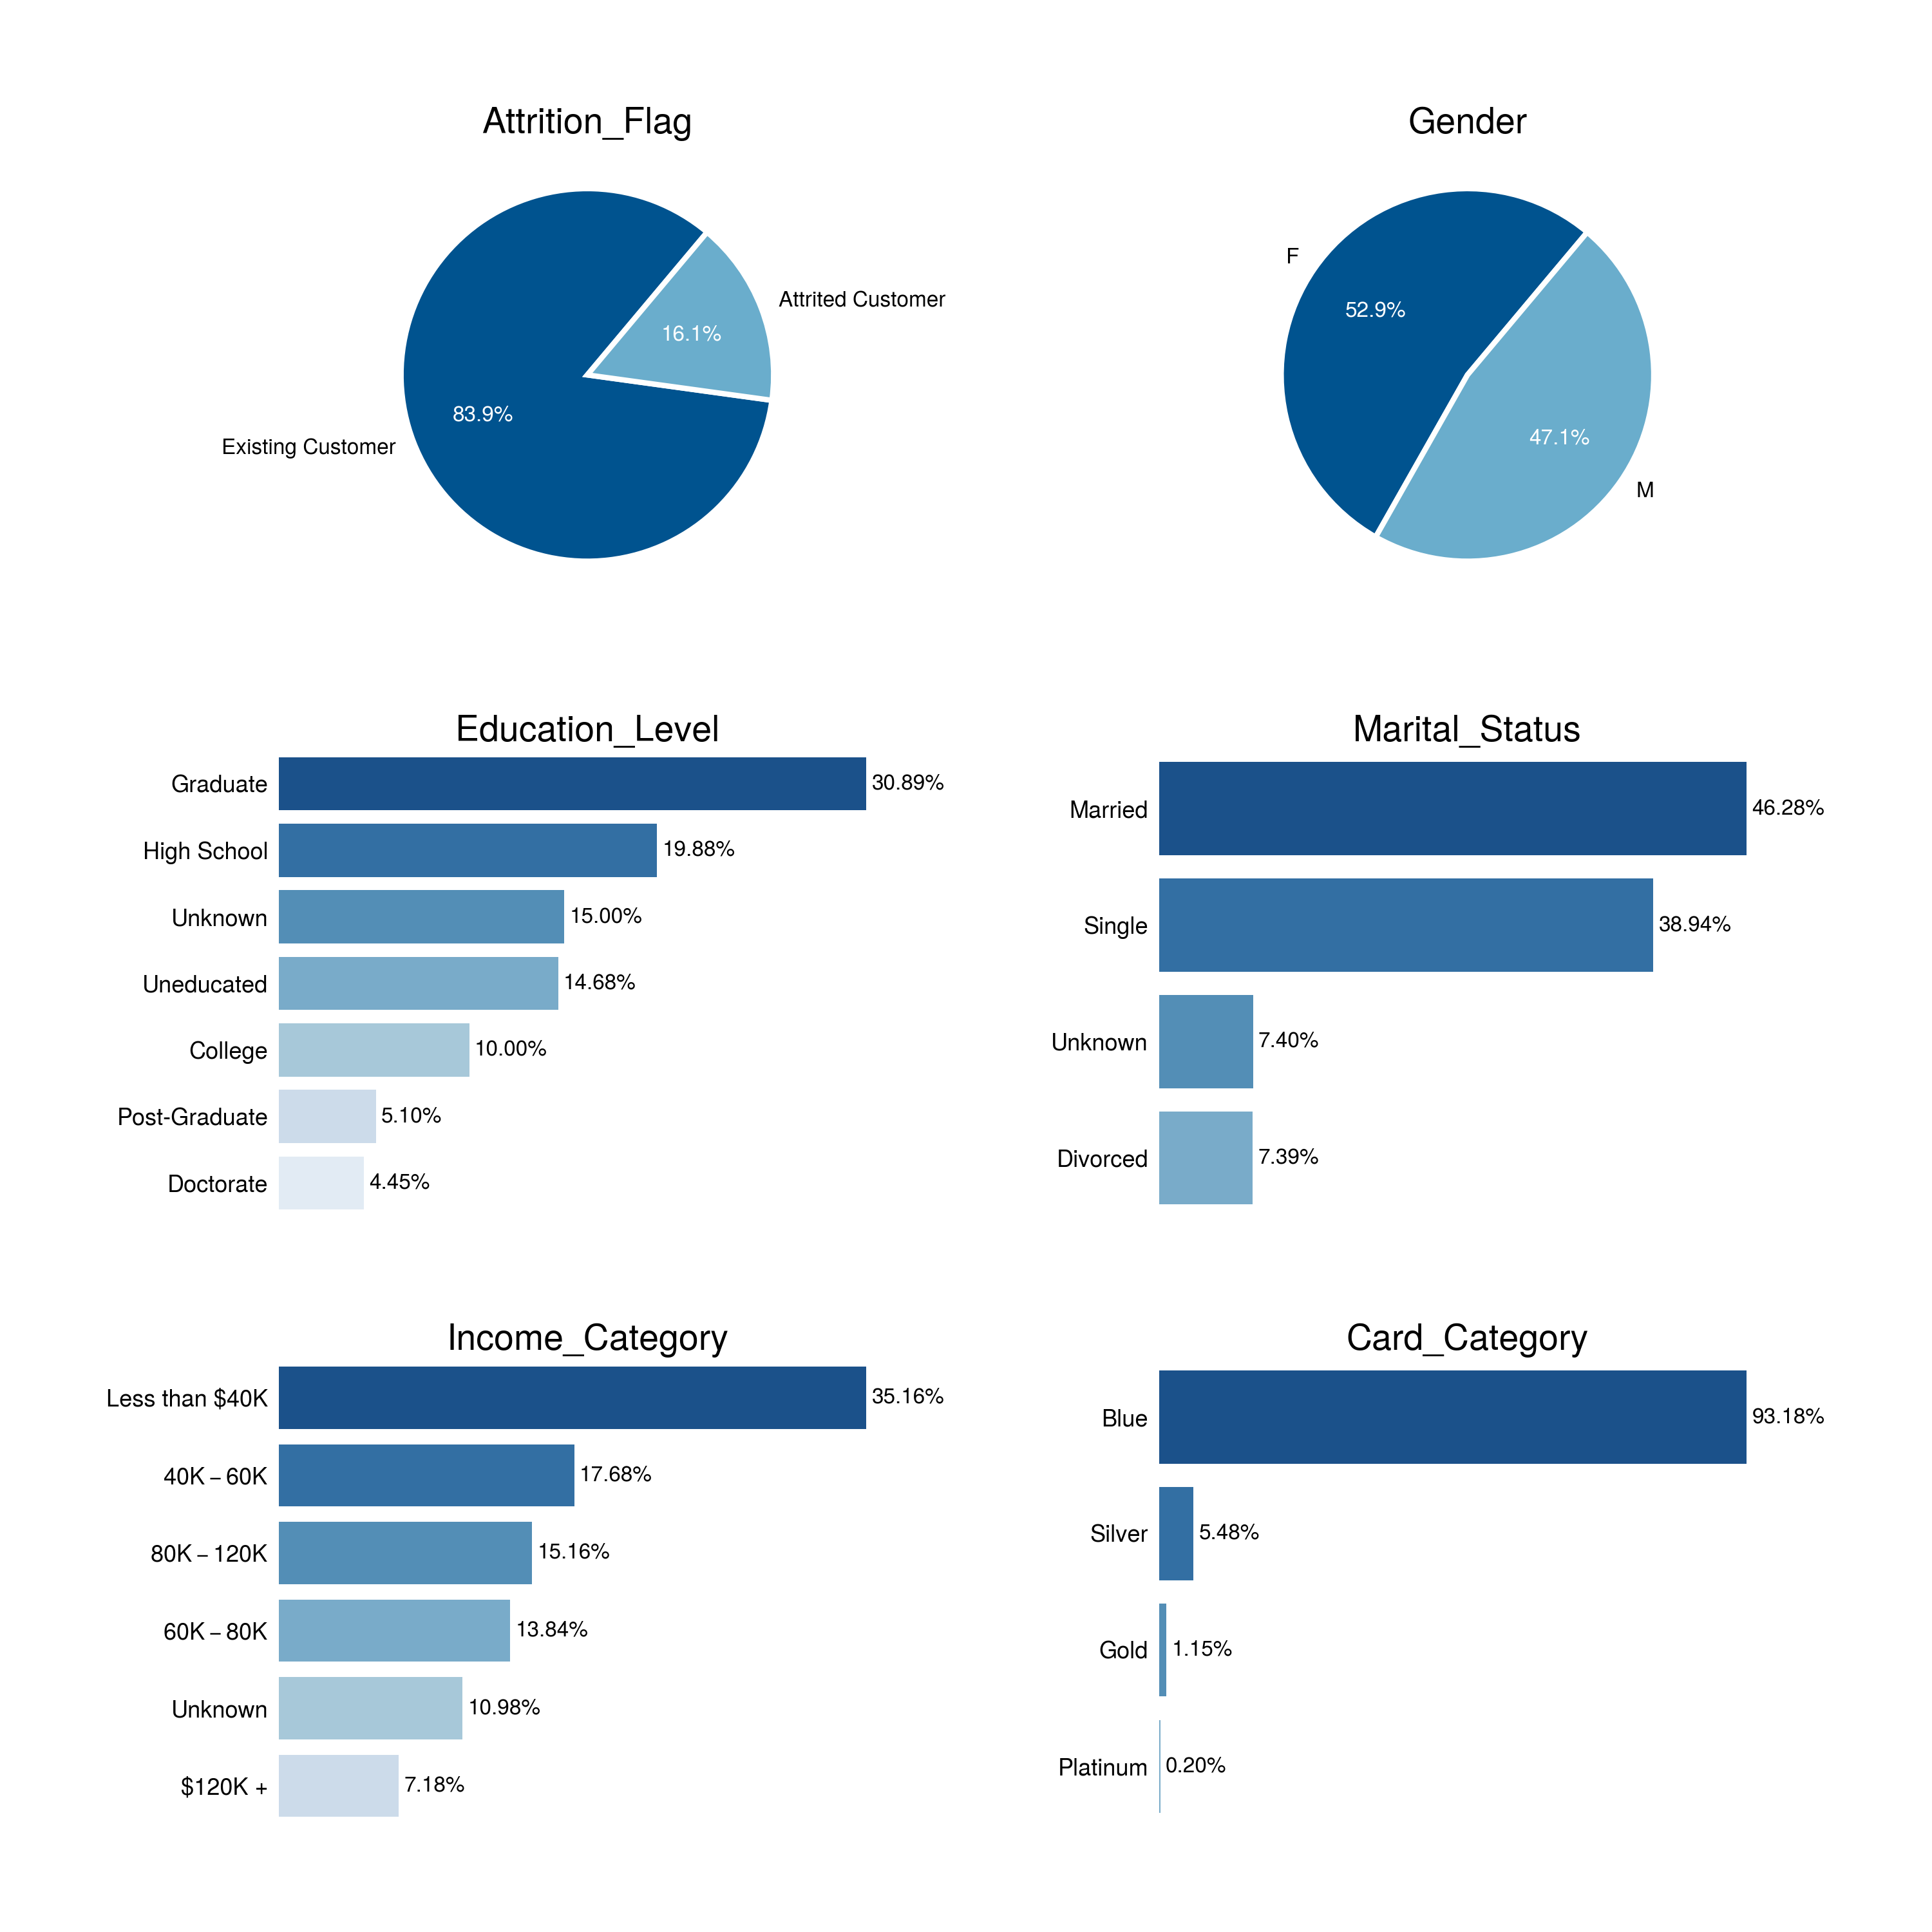

In [ ]:
# select categorical variables
cat_columns = df.select_dtypes(include=object).columns

# visualize
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('white')
mpl.rcParams['font.size'] = 12
colors = sns.color_palette('Blues_r', n_colors=7).as_hex()

# loop columns
for i in (enumerate(cat_columns)):
    plt.subplot(3, 2, i[0]+1)

    if df[i[1]].value_counts().count() > 2:
        ax = sns.countplot(y = i[1], data = df, order=df[i[1]].value_counts().index, palette=colors)
        pct = df[i[1]].value_counts(ascending=False, normalize=True).values * 100
        ax.bar_label(container=ax.containers[0], labels=list(map('{:.2f}%'.format,pct)), padding=3, size=12, color='black')
        ax.grid(False)
        ax.grid(b=None)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.set_xticklabels('')
        plt.xlabel('')
        plt.ylabel('')
        plt.yticks(fontsize=13, color='black')
        plt.box(False)
        plt.title(i[1], fontsize=20, color='black')
        plt.tight_layout(pad=5.0)
        plt.grid(b=None)

    else:
        _, texts, pcts = plt.pie(
            df[i[1]].value_counts(),
            labels=df[i[1]].value_counts().index,
            colors= ['#00538F', '#6AADCC'],
            autopct='%1.1f%%',
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50)
        for pcts in pcts:
          pcts.set_color('white')
        plt.title(i[1], fontsize=20, color='black')

## **3.3. Numerical variables**

Numeric variables are a type of variable in statistics and data analysis that represent measurable or quantifiable numeric values. These variables can undergo arithmetic operations and are characterized by having an order and magnitude.

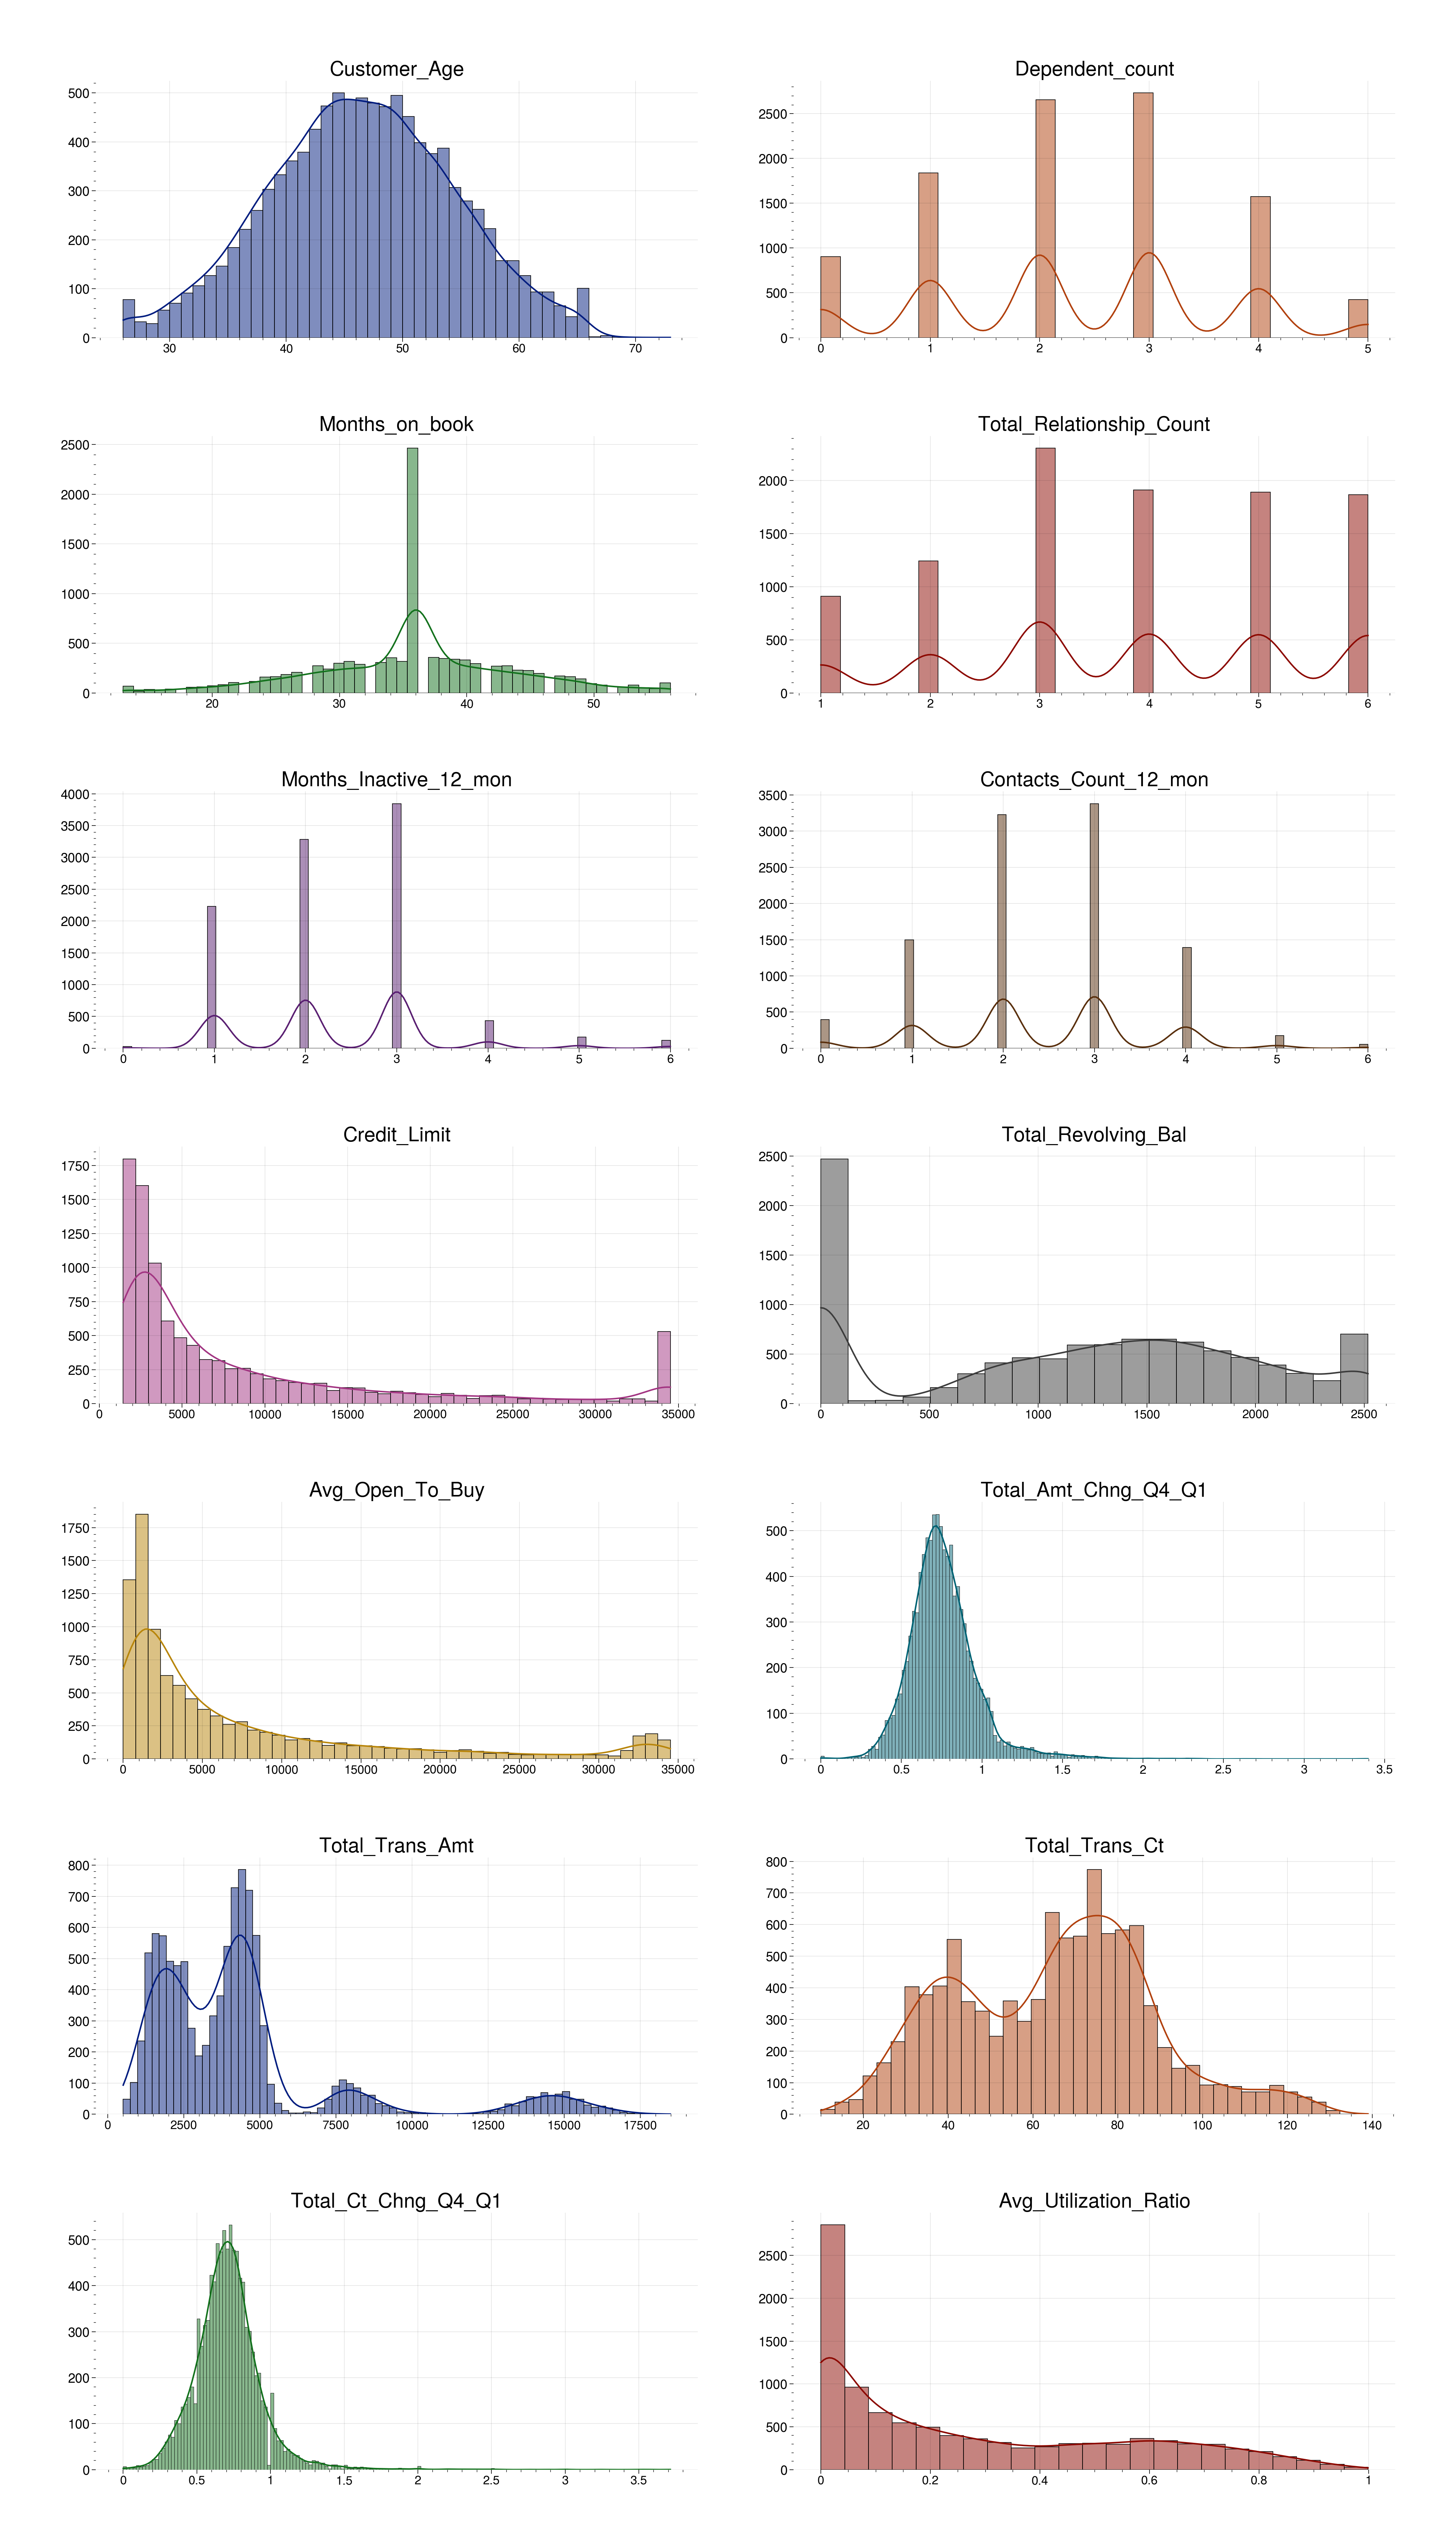

In [ ]:
# select numerical variables
num_columns = df.select_dtypes(exclude=object).columns

# visualize
fig, ax = plt.subplots(figsize =(20, 35))
fig.patch.set_facecolor('white')
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("dark", n_colors=14).as_hex()

# loop columns
for i in (enumerate(num_columns)):
    plt.subplot(7, 2, i[0]+1)
    sns.histplot(x = i[1], data = df, color=colors[i[0]], fill=True, kde=True)
    plt.grid(b=None)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

After the exploratory data analysis, the following observations are made:

* Gender distribution of the customers are almost same percent.
* General customer age is between 40-55 and the average age is 46. Middle age people is the most customer of this bank. This way, the bank offer special campaing for these customers.
* If we check the card category, we can see the general customers are using Blue card. Its mean, most of them uses the basic card. How can the bank increases the other card categories according to the customers Income? We can find out it.
* General education level is around the "Graduate" thats mean most of customer can know fundamental of the economics.
* Credit limits of the Male is higher than the Female customers. Thats mean, Male are using the credit card than the Female.
* Also, the highest income category is just occured by Male customers. Thats mean, Male customer can know most of thing about the investing or something like that.
* Last one is only the middle age people are using the Platinum card. Maybe some basic changes can get the other age ranges to the Bank.
* There are many people occupying the credit limit, perhaps it is necessary to increase it.

# **4. Data Preprocessing**

---



Set of techniques applied to data before it is used in a machine learning model, with the goal of improving the quality and readiness of the data for analysis and modeling.

## **4.1. Skewed**

Skewed variables are those with an unbalanced distribution in the data. This can cause problems in class prediction, as the model can be biased towards the dominant class. Preprocessing techniques can be applied, in this case the boxcox1p and boxcox_normmax functions are used. Box-Cox bias in the data and make them more approximately normal.

In [ ]:
# it is determined which columns have the maximum allowed skewed
skew_limit = 0.5
skew_vals = df[num_columns].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061


In [ ]:
# df before the normalize
df[skew_cols.index]

,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio,Months_Inactive_12_mon
0,1.625,1144,1.335,12691.0,11914.0,0.061,1
1,3.714,1291,1.541,8256.0,7392.0,0.105,1
2,2.333,1887,2.594,3418.0,3418.0,0.000,1
3,2.333,1171,1.405,3313.0,796.0,0.760,4
4,2.500,816,2.175,4716.0,4716.0,0.000,1
...,...,...,...,...,...,...,...
10122,0.857,15476,0.703,4003.0,2152.0,0.462,2
10123,0.683,8764,0.804,4277.0,2091.0,0.511,2
10124,0.818,10291,0.819,5409.0,5409.0,0.000,3
10125,0.722,8395,0.535,5281.0,5281.0,0.000,3


In [ ]:
# normalize skewed features
for col in skew_cols.index:
    df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

In [ ]:
# df after normalize
df[skew_cols.index]

,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio,Months_Inactive_12_mon
0,0.722223,4.022447,0.609716,2.716845,9.828215,0.056755,0.811746
1,0.987854,4.056733,0.650246,2.700656,9.306449,0.092993,0.811746
2,0.842553,4.159755,0.789782,2.658614,8.468467,0.000000,0.811746
3,0.842553,4.029120,0.624199,2.656872,6.903160,0.386625,2.350598
4,0.865025,3.922654,0.744414,2.675504,8.817401,0.000000,0.811746
...,...,...,...,...,...,...,...
10122,0.512129,4.620830,0.430749,2.667145,7.968936,0.292474,1.416280
10123,0.443517,4.512655,0.466993,2.670580,7.937967,0.311096,1.416280
10124,0.497686,4.544323,0.472061,2.682132,8.966357,0.000000,1.916278
10125,0.459877,4.504020,0.360891,2.680998,8.940323,0.000000,1.916278


## **4.2. Scaling features**


Min-max scaling, also known as normalization, is a technique used to transform the values of a variable to a specific range, typically between 0 and 1. This technique is useful when you want to adjust the scale of variable values while preserving their relative proportions. It is used to enhance data interpretation and improve the performance of certain algorithms.

In [ ]:
# scaling features
for col in df[num_columns]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])

## **4.3. Encoding categorical features**

One-hot encoding is a technique used to represent categorical variables as binary variables. It involves creating new binary columns for each category, where an observation has a value of 1 in the column corresponding to its category and 0 in the other columns. This technique is used to convert categorical variables into a numeric format that machine learning algorithms can interpret.

In [ ]:
# one hot encoding
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# select categorical variables
categ = df.select_dtypes(include=object).columns

# encoding with get dummies
df = pd.get_dummies(df, columns=categ)

# drop columns to avoid multicollinearity
df= df[df.columns.drop(list(df.filter(regex='Unknown')))]
df= df[df.columns.drop(list(df.filter(regex='Platinum')))]

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver
0,0,0.404255,0,0.6,0.604651,0.8,0.262481,0.500000,0.795967,0.308701,...,1,0,0,0,1,0,0,1,0,0
1,0,0.489362,1,1.0,0.720930,1.0,0.262481,0.333333,0.683417,0.343266,...,0,1,0,0,0,0,1,1,0,0
2,0,0.531915,0,0.6,0.534884,0.6,0.262481,0.000000,0.391116,0.000000,...,1,0,0,0,0,1,0,1,0,0
3,0,0.297872,1,0.8,0.488372,0.4,0.760075,0.166667,0.379005,1.000000,...,0,0,0,0,0,0,1,1,0,0
4,0,0.297872,0,0.6,0.186047,0.8,0.262481,0.000000,0.508545,0.000000,...,1,0,0,0,1,0,0,1,0,0


# **5. Modeling**

---



Process of building a statistical or mathematical model that captures the underlying relationships and patterns in data. Modeling involves selecting an appropriate machine learning algorithm or technique, tuning model parameters, and training the model using training data so that it can make predictions or decisions on new or previously unseen data.

## **5.1. Dataset preparation**

In [ ]:
# division of the input and response variables, as well as the training sets
y = df.pop("Attrition_Flag")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

## **5.2. Training and validation**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [ ]:
# training
xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=69, ...)

In [ ]:
# validation

xgb_model.score(X_test, y_test)

0.9718657453109576

# **6. Interpretation of results**

---



## **6.1. Model evaluation**

In [ ]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1708
           1       0.93      0.89      0.91       318

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



## **6.2. ROC curve**

 With a ROC curve, you're trying to find a good model that optimizes the trade off between the False Positive Rate (FPR) and True Positive Rate (TPR). What counts here is how much area is under the curve (Area under the Curve = AuC). The ideal curve in the left image fills in 100%, which means that you're going to be able to distinguish between negative results and positive results 100% of the time (which is almost impossible in real life). The further you go to the right, the worse the detection. The ROC curve to the far right does a worse job than chance, mixing up the negatives and positives (which means you likely have an error in your setup).

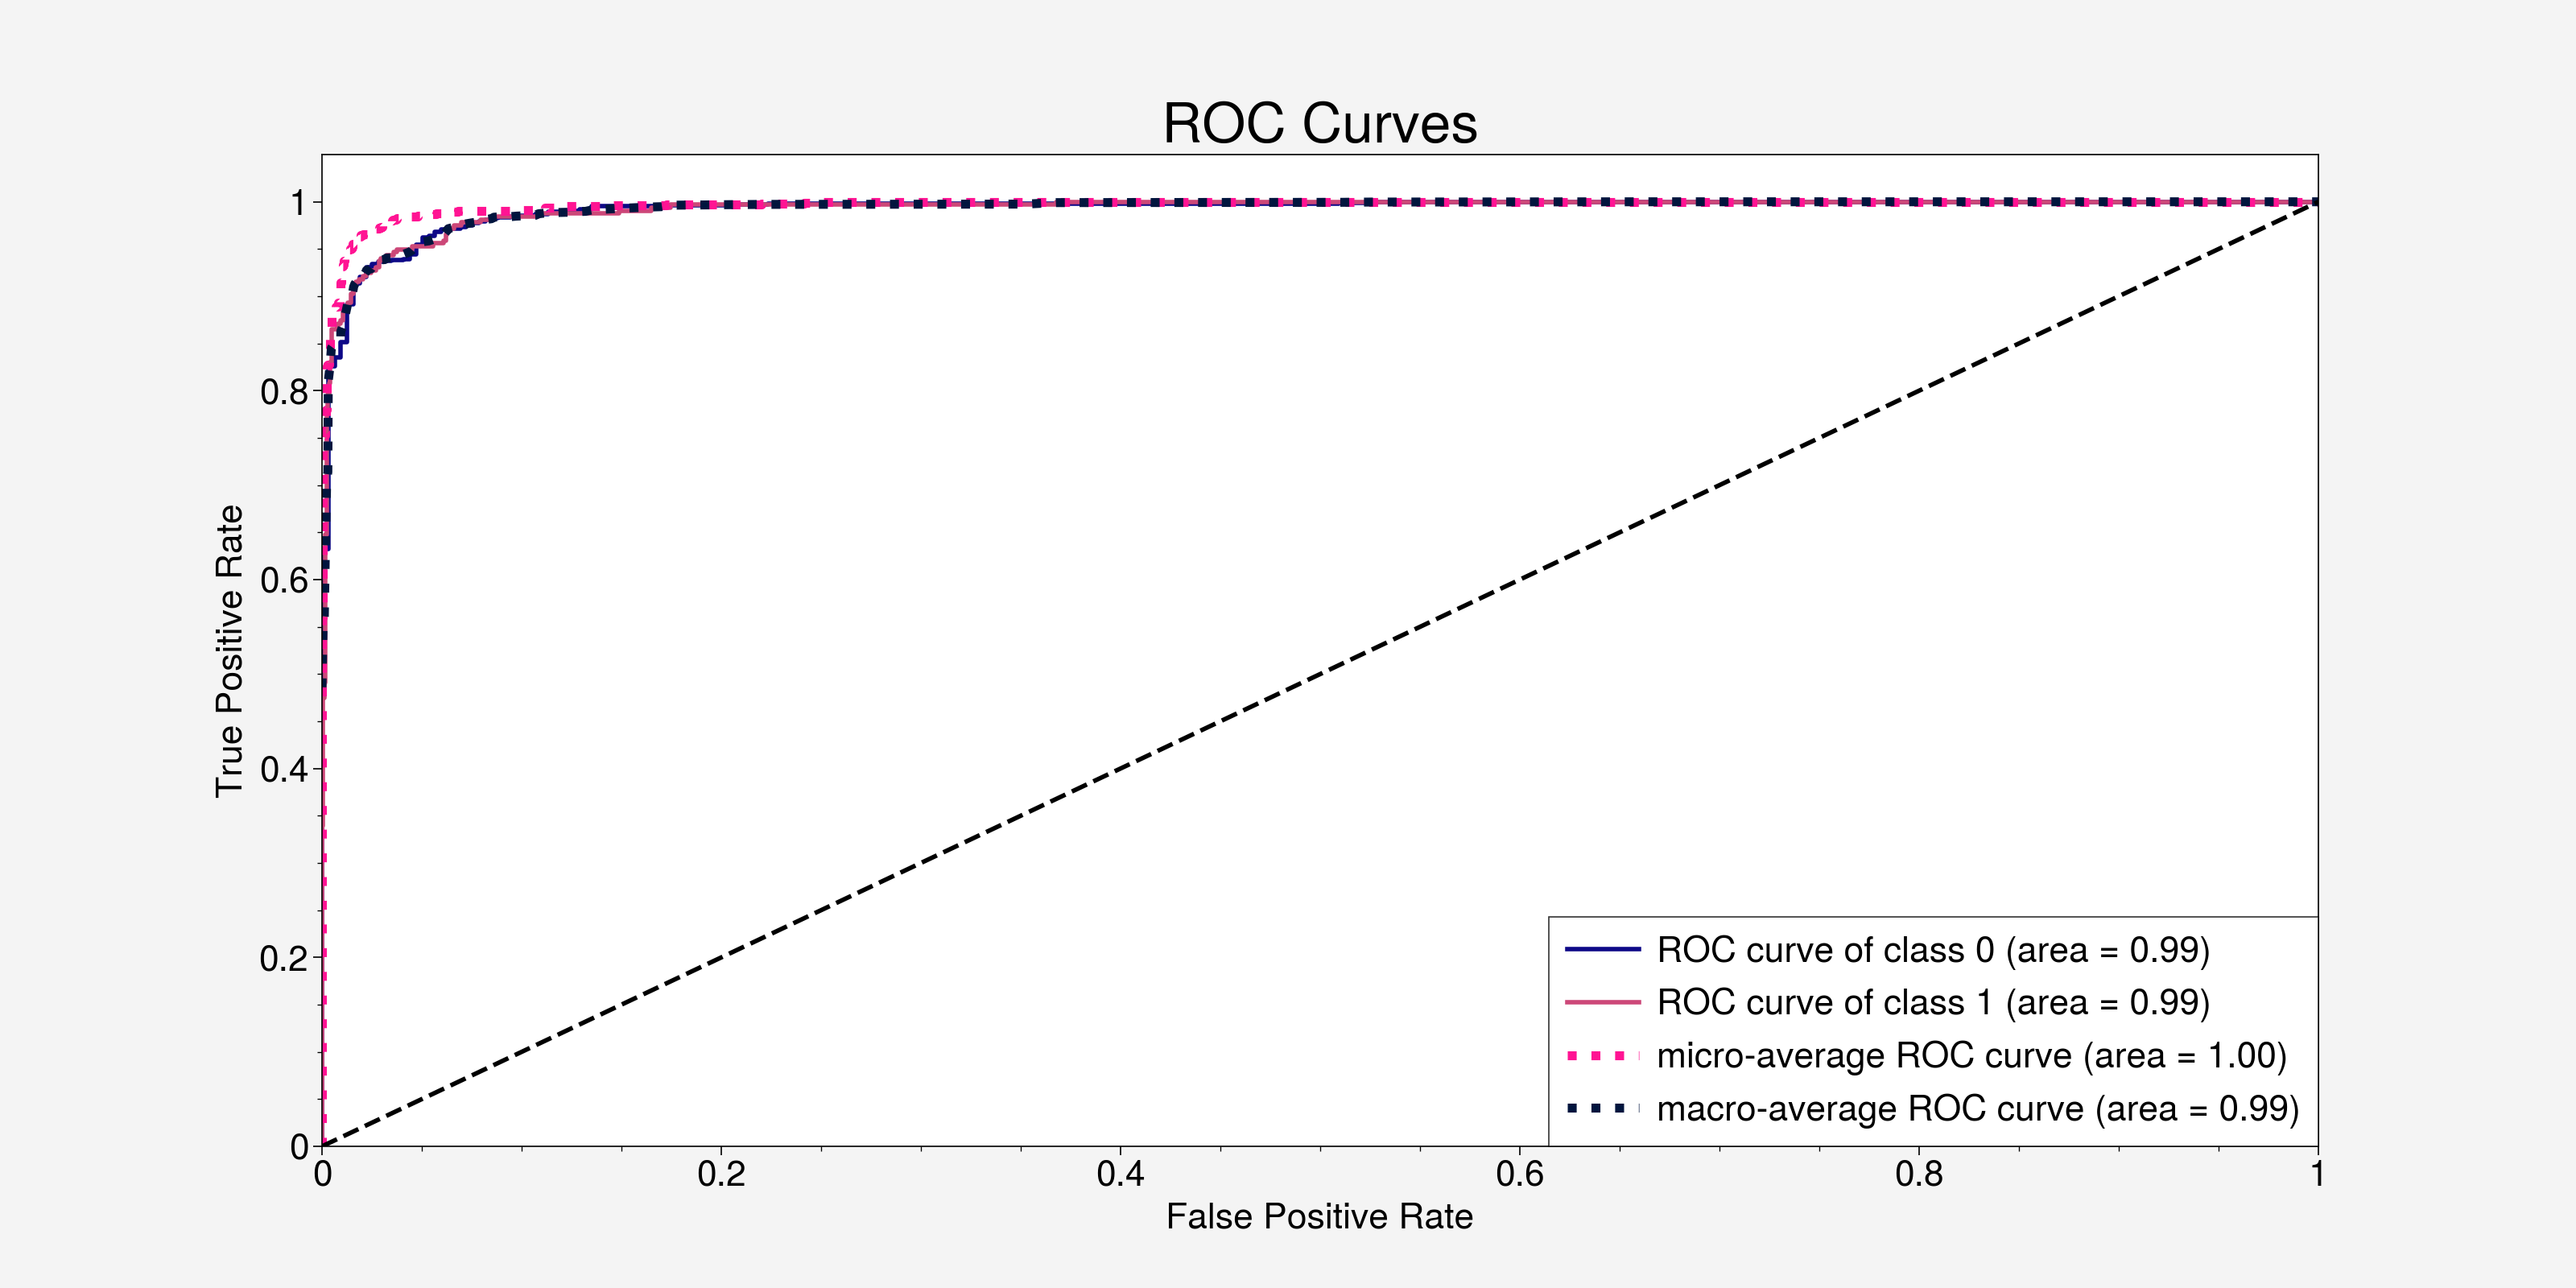

In [ ]:
# plotting ROC curves
y_true = y_test
y_probas = xgb_model.predict_proba(X_test)

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

The model line is observed in the left corner, which provides visual information on the efficiency of the model.

## **6.3. Important Features**

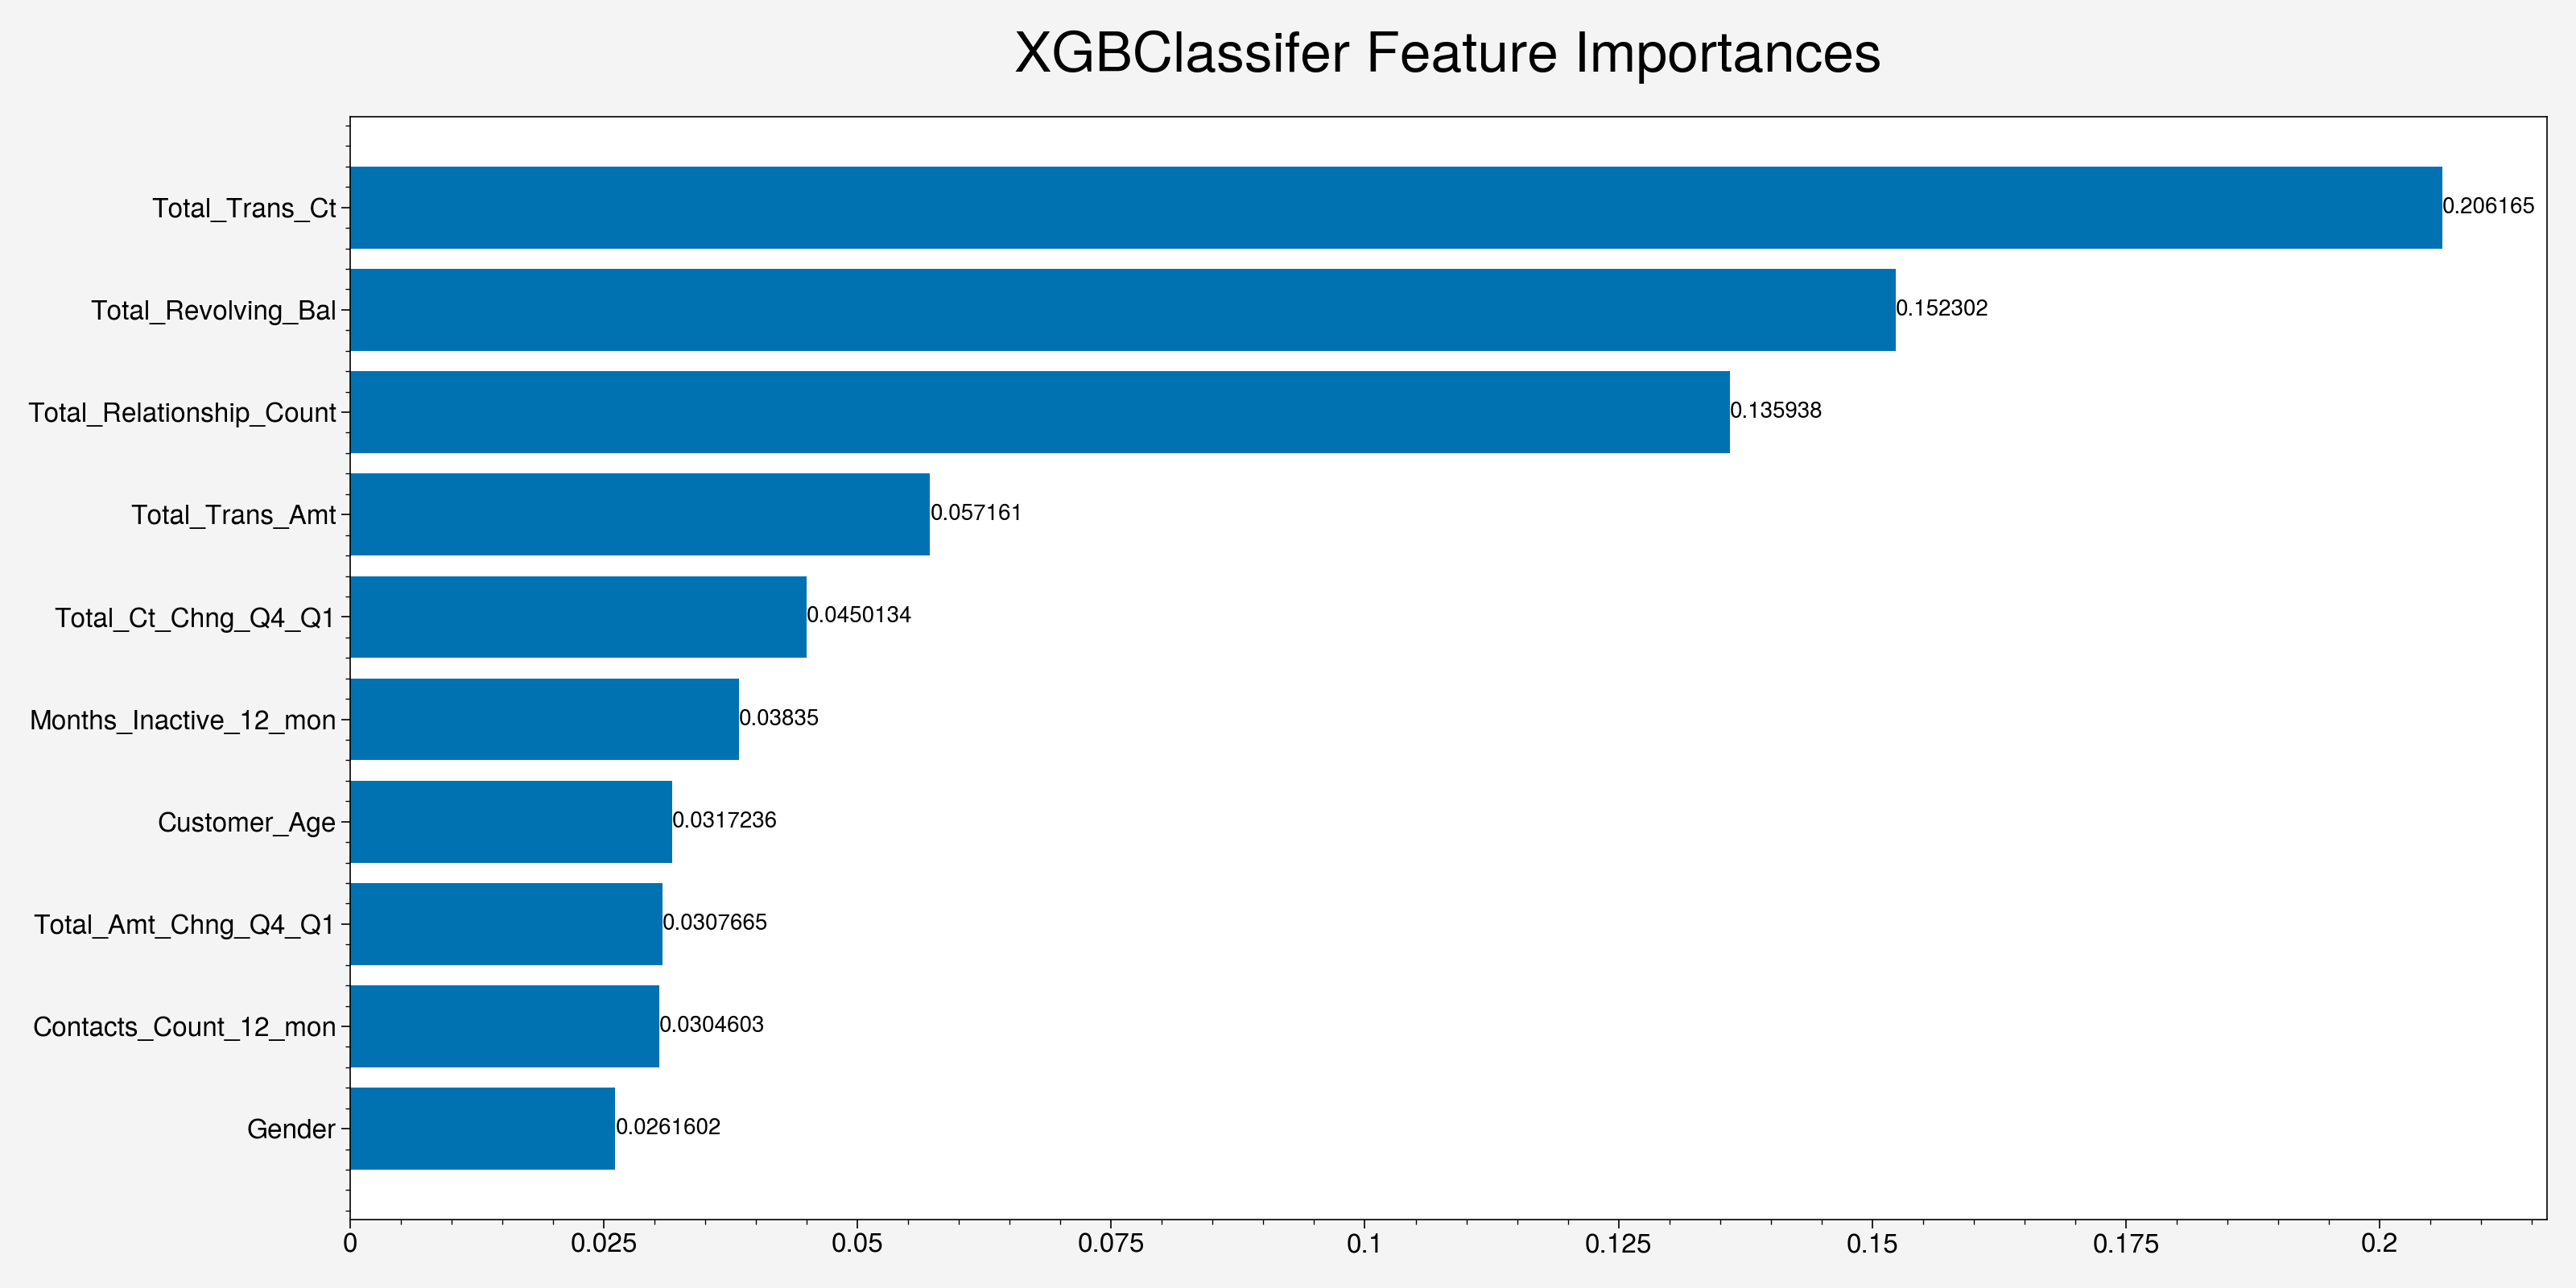

In [ ]:
# plotting the important features

req_cols = df.columns
features_to_plot = 10

importances = xgb_model.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(req_cols)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y_ticks, values,)
ax.set_yticklabels(best_vars, size=12)
ax.set_yticks(y_ticks)
ax.set_title("XGBClassifer Feature Importances", size=25, pad=20, color='black')
ax.bar_label(ax.containers[0], size="10")
fig.tight_layout()
plt.grid(False)
plt.show()

Therefore, the variables "Total_Trans_Ct", "Total_Revolving_Val" and "Total_Relationsip_Count" have a greater contribution to the prediction of the model.